In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR

In [2]:
PROJECT_ROOT_DIR = "H:\Advanced Data Analytics\Week 5"
CHAPTER_ID = "Chapter5SVM"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [4]:
svm_clf = SVC(kernel = "linear", C = float("inf"))
svm_clf.fit(x, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [6]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#C1D0FF')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

Saving figure Bad Decision Margins And Large Margin Classification


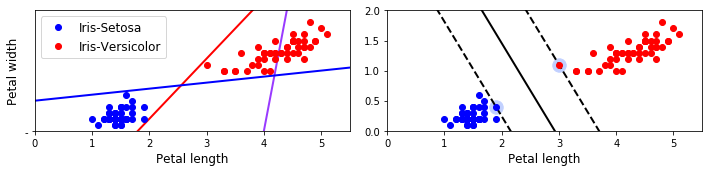

In [7]:
plt.figure(figsize = (10, 2.5))

plt.subplot(121)
plt.plot(x0, pred_1, "#993AFF", "-", linewidth=2)
plt.plot(x0, pred_2, "r-", linewidth=2)
plt.plot(x0, pred_3, "b-", linewidth=2)
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo", label="Iris-Setosa")
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "ro", label="Iris-Versicolor")
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "ro")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo")
plt.xlabel("Petal length", fontsize=12)
plt.axis([0, 5.5, 0, 2])

save_fig("Bad Decision Margins And Large Margin Classification")
plt.show()

Saving figure Feature Scale Sensitivity


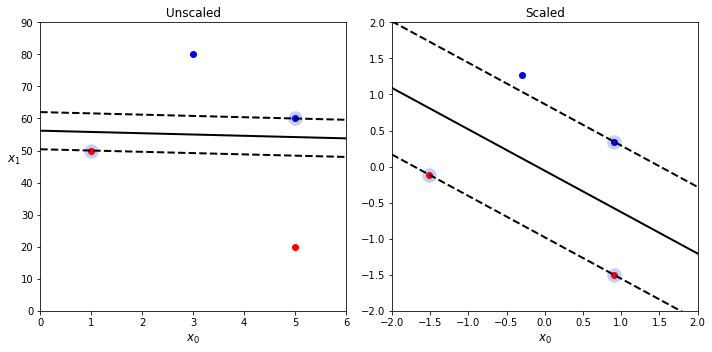

In [8]:
xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel = "linear", C = 100)
svm_clf.fit(xs, ys)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(xs[:, 0][ys == 1], xs[:, 1][ys == 1], "bo")
plt.plot(xs[:, 0][ys == 0], xs[:, 1][ys == 0], "ro")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=12)
plt.ylabel("$x_1$  ", fontsize = 12, rotation = 0)
plt.title("Unscaled", fontsize = 12)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(xs)
svm_clf.fit(x_scaled, ys)

plt.subplot(122)
plt.plot(x_scaled[:, 0][ys == 1], x_scaled[:, 1][ys == 1], "bo")
plt.plot(x_scaled[:, 0][ys == 0], x_scaled[:, 1][ys == 0], "ro")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize = 12)
plt.title("Scaled", fontsize = 12)
plt.axis([-2, 2, -2, 2])

save_fig("Feature Scale Sensitivity")

Saving figure Outlier Sensitivity


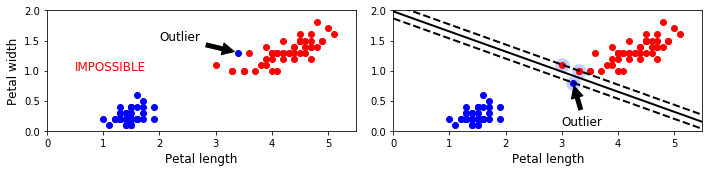

In [9]:
x_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
xo1 = np.concatenate([x, x_outliers[:1]], axis = 0)
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)
xo2 = np.concatenate([x, x_outliers[1:]], axis = 0)
yo2 = np.concatenate([y, y_outliers[1:]], axis = 0)

svm_clf2 = SVC(kernel = "linear", C=10**9)
svm_clf2.fit(xo2, yo2)

plt.figure(figsize = (10, 2.5))

plt.subplot(121)
plt.plot(xo1[:, 0][yo1 == 1], xo1[:, 1][yo1==1], "ro")
plt.plot(xo1[:, 0][yo1 == 0], xo1[:, 1][yo1==0], "bo")
plt.text(0.5, 1.0, "IMPOSSIBLE", fontsize=12, color="red")
plt.xlabel("Petal length", fontsize = 12)
plt.ylabel("Petal width", fontsize = 12)
plt.annotate("Outlier",
             xy=(x_outliers[0][0], x_outliers[0][1]),
             xytext=(2, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=12,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(xo2[:, 0][yo2==1], xo2[:, 1][yo2==1], "ro")
plt.plot(xo2[:, 0][yo2==0], xo2[:, 1][yo2==0], "bo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=12)
plt.annotate("Outlier",
             xy=(x_outliers[1][0], x_outliers[1][1]),
             xytext=(3, 0.1),
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=12,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("Outlier Sensitivity")
plt.show()

In [10]:
x = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [11]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [12]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [13]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(x, y)
scaled_svm_clf2.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [14]:
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

In [15]:
t = y * 2 - 1

support_vectors_idx1 = (t * (x.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (x.dot(w2) + b2) < 1).ravel()

svm_clf1.support_vectors_ = x[support_vectors_idx1]
svm_clf2.support_vectors_ = x[support_vectors_idx2]

Saving figure Fewer Violations vs Larger Margin


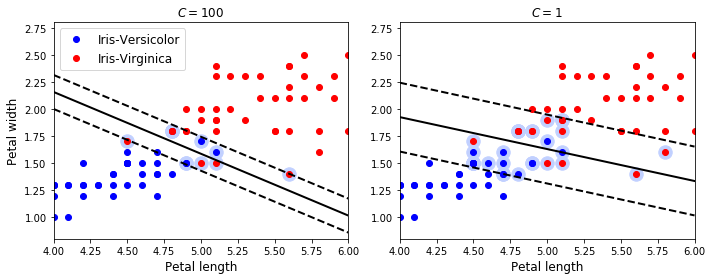

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bo", label="Iris-Versicolor")
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "ro", label="Iris-Virginica")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=12)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "bo")
plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "ro")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=12)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=12)
plt.axis([4, 6, 0.8, 2.8])

save_fig("Fewer Violations vs Larger Margin")

Saving figure Adding Nonlinear Features


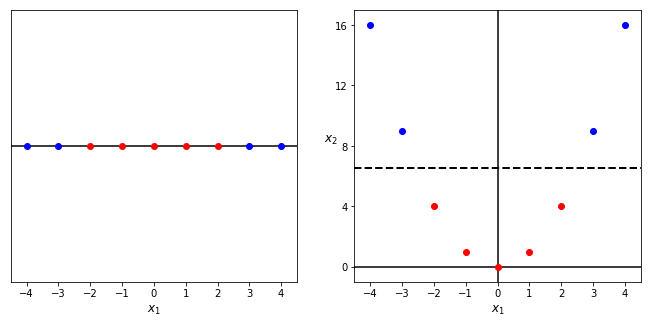

In [17]:
x1D = np.linspace(-4, 4, 9).reshape(-1, 1)
x2D = np.c_[x1D, x1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.axhline(y=0, color='k')
plt.plot(x1D[:, 0][y == 0], np.zeros(4), "bo")
plt.plot(x1D[:, 0][y == 1], np.zeros(5), "ro")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=12)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x2D[:, 0][y == 0], x2D[:, 1][y == 0], "bo")
plt.plot(x2D[:, 0][y == 1], x2D[:, 1][y == 1], "ro")
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "k--", linewidth=2)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("Adding Nonlinear Features", tight_layout=False)
plt.show()

In [18]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [19]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(x, y)

C:\Users\19673418\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [20]:
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "bo")
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "ro")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=12)
    plt.ylabel(r"$x_2$", fontsize=12, rotation=0)

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.bwr, alpha=0.1)

Saving figure Linear SVM With Polynomial Features


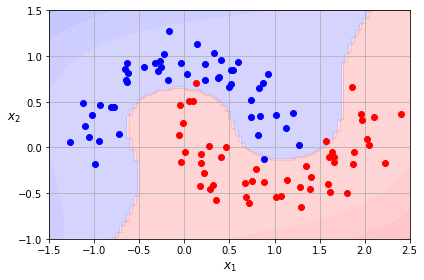

In [22]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

save_fig("Linear SVM With Polynomial Features")
plt.show()

In [23]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [24]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Saving figure Linear SVM With Polynomial Kernel


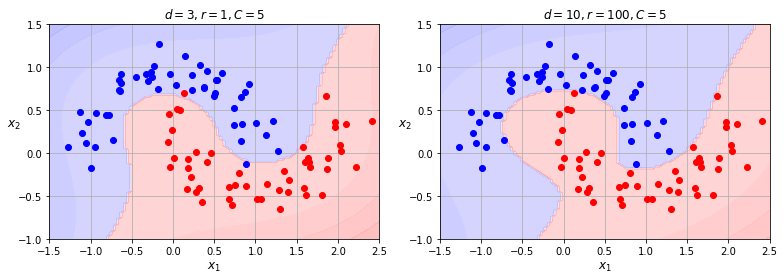

In [25]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=12)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=12)

save_fig("Linear SVM With Polynomial Kernel")
plt.show()

In [26]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

In [27]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

xK = np.c_[gaussian_rbf(x1D, -2, gamma), gaussian_rbf(x1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

Saving figure Similarity Features


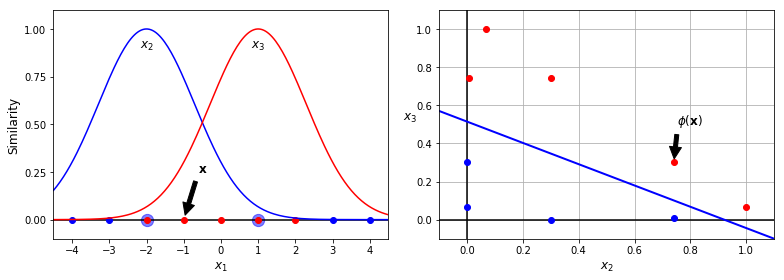

In [28]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="blue")
plt.plot(x1D[:, 0][yk == 0], np.zeros(4), "bo")
plt.plot(x1D[:, 0][yk == 1], np.zeros(5), "ro")
plt.plot(x1s, x2s, "b-")
plt.plot(x1s, x3s, "r-")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"Similarity", fontsize=12)
plt.annotate(r'$\mathbf{x}$',
             xy=(x1D[3, 0], 0),
             xytext=(-0.5, 0.25),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=12,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=12)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=12)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(xK[:, 0][yk==0], xK[:, 1][yk==0], "bo")
plt.plot(xK[:, 0][yk==1], xK[:, 1][yk==1], "ro")
plt.xlabel(r"$x_2$", fontsize=12)
plt.ylabel(r"$x_3$  ", fontsize=12, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(xK[3, 0], xK[3, 1]),
             xytext=(0.8, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=12,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "b-", linewidth=2)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("Similarity Features")
plt.show()

In [29]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])

rbf_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [30]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

Saving figure Linear SVM With RBF Kernel


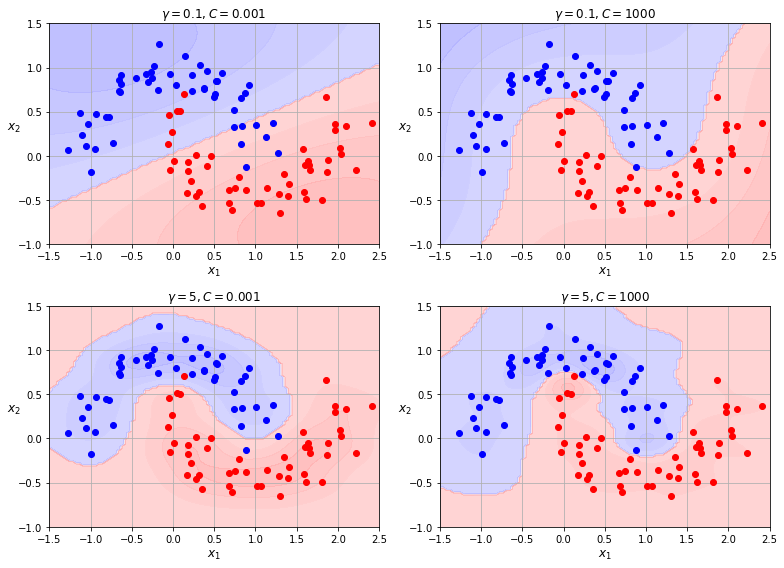

In [31]:
svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 8))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=12)

save_fig("Linear SVM With RBF Kernel")
plt.show()

In [32]:
np.random.seed(42)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

In [33]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(x, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [34]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(x, y)
svm_reg2.fit(x, y)

def find_support_vectors(svm_reg, x, y):
    y_pred = svm_reg.predict(x)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, x, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, x, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [35]:
def plot_svm_regression(svm_reg, x, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(x[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#C1D0FF')
    plt.plot(x, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=12)
    plt.legend(loc="upper left", fontsize=12)
    plt.axis(axes)

Saving figure SVM Regression With Different Error Margins


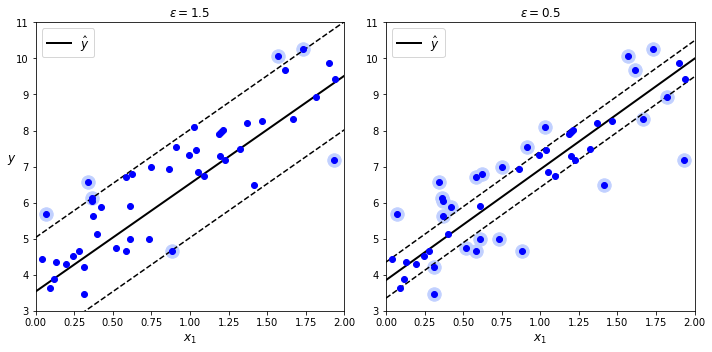

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_svm_regression(svm_reg1, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=12)
plt.ylabel(r"$y$", fontsize=12, rotation=0)

plt.subplot(122)
plot_svm_regression(svm_reg2, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=12)
save_fig("SVM Regression With Different Error Margins")
plt.show()

In [37]:
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()

In [38]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(x, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(x, y)
svm_poly_reg2.fit(x, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Saving figure SVM Regression With Polynomial Kernel


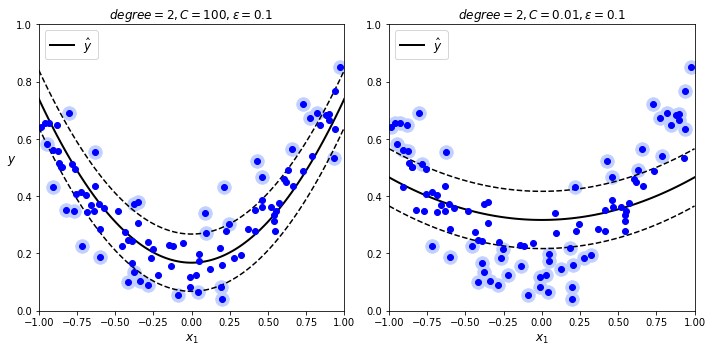

In [40]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=12)
plt.ylabel(r"$y$", fontsize=12, rotation=0)

plt.subplot(122)
plot_svm_regression(svm_poly_reg2, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=12)
save_fig("SVM Regression With Polynomial Kernel")
plt.show()

In [41]:
iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [42]:
def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (x[:, 0] > x1_lim[0]) & (x[:, 0] < x1_lim[1])
    x_crop = x[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(x_crop[:, 0][y_crop==1], x_crop[:, 1][y_crop==1], 0, "ro")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(x_crop[:, 0][y_crop==0], x_crop[:, 1][y_crop==0], 0, "bo")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=12)
    ax.set_xlabel(r"Petal length", fontsize=12)
    ax.set_ylabel(r"Petal width", fontsize=12)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=12)
    ax.legend(loc="upper left", fontsize=12)

Saving figure SVM 3D Plot


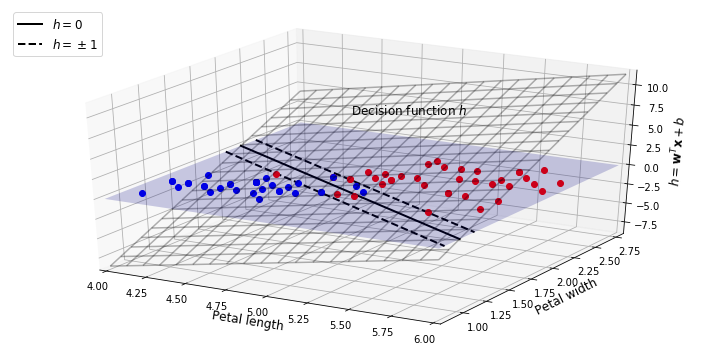

In [43]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

save_fig("SVM 3D Plot")
plt.show()

In [45]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y, 'b')
    plt.plot(x1_lim, [1, 1], "k--")
    plt.plot(x1_lim, [-1, -1], "k--")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=12)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=12)
    plt.title(r"$w_1 = {}$".format(w), fontsize=12)

Saving figure Weight Vector


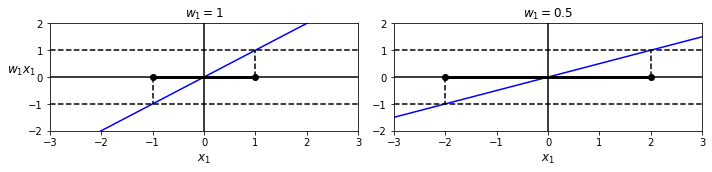

In [47]:
plt.figure(figsize=(10, 2.5))
plt.subplot(121)
plot_2D_decision_function(1, 0)

plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
save_fig("Weight Vector")
plt.show()

In [48]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)

Saving figure Hinge Loss


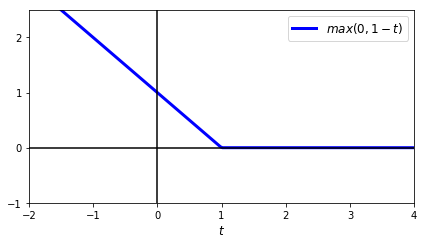

In [50]:
plt.figure(figsize=(6, 3.5))
plt.plot(t, h, "b-", linewidth=3, label="$max(0, 1 - t)$")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=12)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=12)
save_fig("Hinge Loss")
plt.show()